<a href="https://colab.research.google.com/github/economicactivist/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


 ## Write a function
 


In [0]:
def prob_drunk_given_positive(tpr,fpr, prob_drunk_prior, num_of_bayes_updates=1):
  """calculate the probability that a person was actually drunk given a 
  positive test result
  
  first two parameters:
  tpr = true positive rate
  fpr = false positive rate
  """
  pdgp = 0
  for i in range(num_of_bayes_updates):
    new_prior = tpr*prob_drunk_prior / ((tpr*prob_drunk_prior)+(fpr*(1-prob_drunk_prior)))
    prob_drunk_prior = new_prior

  return new_prior

 - What is the probability that a person is drunk after one positive breathalyzer test?

In [0]:
prob_drunk_given_positive(1, .08, 1/1000, 1)

0.012357884330202669

 - What is the probability that a person is drunk after two positive breathalyzer tests?



In [0]:
prob_drunk_given_positive(1, .08, 1/1000, 2)

0.13525210993291495

 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

In [0]:
prob_drunk_given_positive(1, .08, 1/1000, 4)   #brute force method of trying different values

0.9606895076105054

In [0]:
r = prob_drunk_given_positive(1, .08, 1/1000)



def times_to_reach_threshold(func, thresh=0.001):
  x=1  #set counter
  while func <= thresh:
    func = prob_drunk_given_positive(1, .08, 1/1000, x)
    x+=1
  return x - 1

num_of_times = times_to_reach_threshold(r, .95)

print(f'Number of tests needed to reach threshold probability: {num_of_times}')

Number of tests needed to reach threshold probability: 4


Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:

In [0]:
### extract column names from text

import re
text = """
1. Class Name: 2 (democrat, republican)
2. handicapped-infants: 2 (y,n)
3. water-project-cost-sharing: 2 (y,n)
4. adoption-of-the-budget-resolution: 2 (y,n)
5. physician-fee-freeze: 2 (y,n)
6. el-salvador-aid: 2 (y,n)
7. religious-groups-in-schools: 2 (y,n)
8. anti-satellite-test-ban: 2 (y,n)
9. aid-to-nicaraguan-contras: 2 (y,n)
10. mx-missile: 2 (y,n)
11. immigration: 2 (y,n)
12. synfuels-corporation-cutback: 2 (y,n)
13. education-spending: 2 (y,n)
14. superfund-right-to-sue: 2 (y,n)
15. crime: 2 (y,n)
16. duty-free-exports: 2 (y,n)
17. export-administration-act-south-africa: 2 (y,n)
"""
pattern = re.compile(r'\b[a-zA-Z -]+(?=:)')

col_names = re.findall(pattern=pattern, string=text)



In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names=col_names)

In [0]:
df.columns = df.columns.str.replace("-", "_").str.replace("Class Name", "party")

In [0]:
df.columns

Index(['party', 'handicapped_infants', 'water_project_cost_sharing',
       'adoption_of_the_budget_resolution', 'physician_fee_freeze',
       'el_salvador_aid', 'religious_groups_in_schools',
       'anti_satellite_test_ban', 'aid_to_nicaraguan_contras', 'mx_missile',
       'immigration', 'synfuels_corporation_cutback', 'education_spending',
       'superfund_right_to_sue', 'crime', 'duty_free_exports',
       'export_administration_act_south_africa'],
      dtype='object')

In [0]:
df = df.replace("?", np.nan)

In [0]:
df.head()

,party,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
repub = df.query("party=='republican'").replace({'y': 1, 'n':0})  

In [0]:
democ = df.query("party=='democrat'").replace({'y': 1, 'n':0})  

In [0]:
def confidence_interval(data, confidence=0.95):

  data = np.array(data)
  mean = np.mean(data)
  n = len(data)

  s = np.std(data, ddof=1) 
 
  stderr = s / np.sqrt(n)
  margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [0]:
confidence_interval(repub.el_salvador_aid.dropna())

(0.9515151515151515, 0.9183979451371699, 0.9846323578931332)

In [0]:
confidence_interval(democ.el_salvador_aid.dropna())

(0.21568627450980393, 0.1648631139997972, 0.26650943501981067)

In [0]:
def confidence_interval_dataframe(df):
  
  confidence_intervals = []
  
  # Turn dataframe into a numpy array
  # List values by column and not by row
  df = df.values.T
  
  # Remove nan values from columns
  cleaned_df = []
  for col in df:
    cleaned_col = col[~np.isnan(col)]
    
    # Calculate Confidence interval for each issue
    confidence_intervals.append(confidence_interval(cleaned_col))
    
  confidence_intervals = pd.DataFrame(confidence_intervals, columns=['mean', 'lower', 'upper'])  
    
  return confidence_intervals

# We only want the issue columns not the string "party" column
only_votes = democ.drop('party', axis='columns')

democ_confidence_interval_df = confidence_interval_dataframe(only_votes)
democ_confidence_interval_df.head(20)

,mean,lower,upper
0,0.604651,0.544593,0.664710
1,0.502092,0.438245,0.565939
2,0.888462,0.849944,0.926980
3,0.054054,0.026332,0.081776
4,0.215686,0.164863,0.266509
5,0.476744,0.415392,0.538097
6,0.772201,0.720782,0.823620
7,0.828897,0.783085,0.874710
8,0.758065,0.704394,0.811735
9,0.471483,0.410757,0.532208


In [0]:
democ_confidence_interval_df['margin_of_error'] = democ_confidence_interval_df['upper'] - democ_confidence_interval_df['mean']

print(democ_confidence_interval_df.shape)
democ_confidence_interval_df.head()

(16, 4)


,mean,lower,upper,margin_of_error
0,0.604651,0.544593,0.664710,0.060058
1,0.502092,0.438245,0.565939,0.063847
2,0.888462,0.849944,0.926980,0.038518
3,0.054054,0.026332,0.081776,0.027722
4,0.215686,0.164863,0.266509,0.050823


Text(0, 0.5, "Percent of Democrats voting 'yes'")

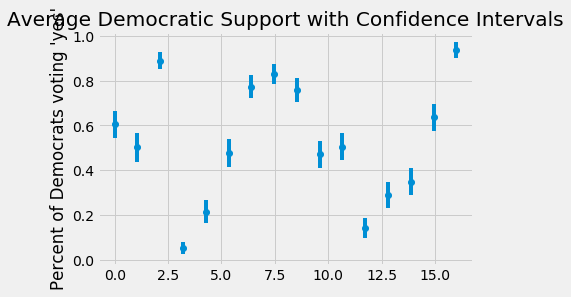

In [0]:
x = np.linspace(0, democ_confidence_interval_df.shape[0], democ_confidence_interval_df.shape[0])
y = democ_confidence_interval_df['mean']
yerr = democ_confidence_interval_df['margin_of_error']


plt.style.use('fivethirtyeight')
plt.errorbar(x, y, yerr, fmt='o');
plt.title('Average Democratic Support with Confidence Intervals')
plt.ylabel("Percent of Democrats voting 'yes'")

In [0]:
bayesian_confidence_interval, _, _ = stats.bayes_mvs(repub.el_salvador_aid.dropna(), alpha=.95)


In [0]:
bayesian_confidence_interval[1][0]

0.9183979451371699

In [0]:
def bayesian_confidence_interval_dataframe(df):
  
  b_confidence_intervals = []
  
  # Turn dataframe into a numpy array
  # List values by column and not by row
  df = df.values.T
  
  # Remove nan values from columns
  cleaned_df = []
  for col in df:
    cleaned_col = col[~np.isnan(col)]
    bayesian_confidence_interval, _, _ = stats.bayes_mvs(cleaned_col, alpha=.95)
    mean = bayesian_confidence_interval[0]
    lower = bayesian_confidence_interval[1][0]
    upper = bayesian_confidence_interval[1][1]
    # Calculate Confidence interval for each issue
    ci_data = (mean,lower,upper)
    b_confidence_intervals.append(ci_data)
    
  b_confidence_intervals = pd.DataFrame(b_confidence_intervals, columns=['mean', 'lower', 'upper'])  
    
  return b_confidence_intervals



b_democ_confidence_interval_df = bayesian_confidence_interval_dataframe(only_votes)
b_democ_confidence_interval_df.head(20)

,mean,lower,upper
0,0.604651,0.544593,0.664710
1,0.502092,0.438245,0.565939
2,0.888462,0.849944,0.926980
3,0.054054,0.026332,0.081776
4,0.215686,0.164863,0.266509
5,0.476744,0.415392,0.538097
6,0.772201,0.720782,0.823620
7,0.828897,0.783085,0.874710
8,0.758065,0.704394,0.811735
9,0.471483,0.410757,0.532208


In [0]:
b_democ_confidence_interval_df['margin_of_error'] = b_democ_confidence_interval_df['upper'] - b_democ_confidence_interval_df['mean']

print(b_democ_confidence_interval_df.shape)
b_democ_confidence_interval_df.head()

(16, 4)


,mean,lower,upper,margin_of_error
0,0.604651,0.544593,0.664710,0.060058
1,0.502092,0.438245,0.565939,0.063847
2,0.888462,0.849944,0.926980,0.038518
3,0.054054,0.026332,0.081776,0.027722
4,0.215686,0.164863,0.266509,0.050823


In [0]:
pd.util.testing.assert_frame_equal(democ_confidence_interval_df, b_democ_confidence_interval_df, check_exact=True)

AssertionError: ignored

###difference between dataframes seems minimal.  Don't see the point in choosing bayesian 

Text(0, 0.5, "Percent of Democrats voting 'yes'")

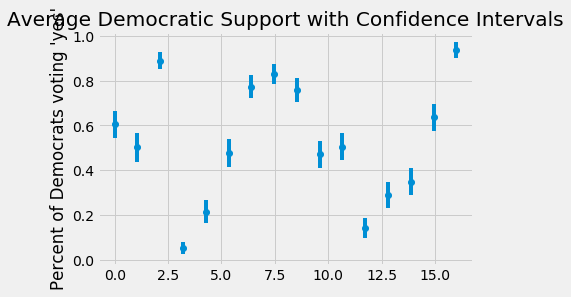

In [0]:
h = np.linspace(0, b_democ_confidence_interval_df.shape[0], b_democ_confidence_interval_df.shape[0])
v = b_democ_confidence_interval_df['mean']
v_err = b_democ_confidence_interval_df['margin_of_error']


plt.style.use('fivethirtyeight')
plt.errorbar(x, y, v_err, fmt='o');
plt.title('Average Democratic Support with Confidence Intervals')
plt.ylabel("Percent of Democrats voting 'yes'")

## In your own words, summarize the difference between Bayesian and Frequentist statistics


Frequentist statistics assumes that a given phenonomenon can be described by relating that phenomenon to a larger population.  From this larger population a phenonemon could be considered a random sample (that may or may not be representative of the population due to randomness).  

People essentially have to be trained to think like frequentists.


Bayesian statistics involves making probabalistic assumptions about he present of future based on prior assumptions.  If there is little information a phenonmenon, the characteristics of that phenomenon become the basis for future assumptions.  If the intial assumptions were inaccurate, as more information is acquired, then initial incorrect assumptions will be greatly subdued by new more accurate information.  Thus, even a poor prior assumption can still converge to accurate assumptions over time which can be said to be a better reflection of reality. 

 Working with the knowledge one has about an unknown or unfamiliar situation and building upon that knowledge (and discarding incorrect assumptions) mirrors the more humanistic process of arriving a probabilistic conclusions. 



## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!